<a href="https://colab.research.google.com/github/thabresh-s/Data-Science/blob/main/STOCK_MARKET_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


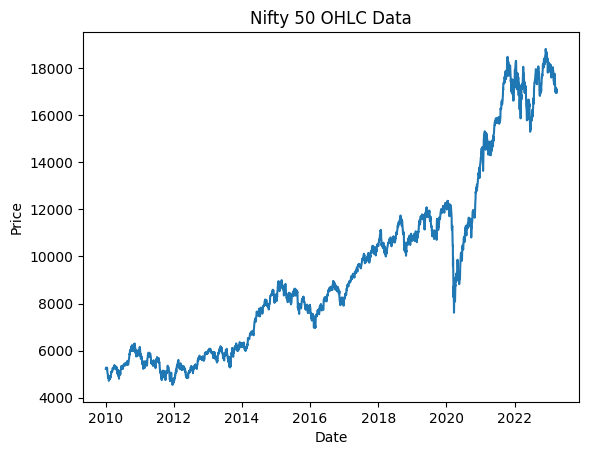

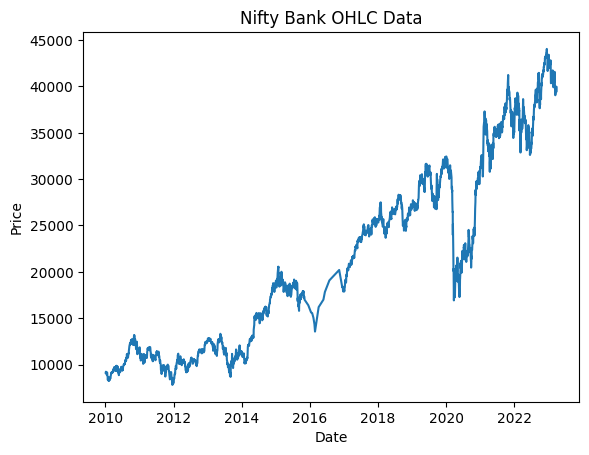

Nifty 50 Summary Statistics:
               Open          High           Low         Close     Adj Close  \
count   3250.000000   3250.000000   3250.000000   3250.000000   3250.000000   
mean    9564.525664   9613.482219   9498.933178   9557.111170   9557.111170   
std     3950.295623   3965.196543   3925.820230   3946.781987   3946.781987   
min     4623.149902   4623.149902   4531.149902   4544.200195   4544.200195   
25%     5970.687378   6006.149902   5930.199951   5967.449829   5967.449829   
50%     8586.975098   8629.825195   8540.299805   8588.450195   8588.450195   
75%    11485.075195  11540.975342  11415.324707  11465.950195  11465.950195   
max    18871.949219  18887.599609  18778.199219  18812.500000  18812.500000   

             Volume  
count  3.250000e+03  
mean   2.291596e+05  
std    2.157542e+05  
min    0.000000e+00  
25%    1.069250e+05  
50%    1.865500e+05  
75%    2.976000e+05  
max    1.811000e+06  

Nifty Bank Summary Statistics:
               Open          

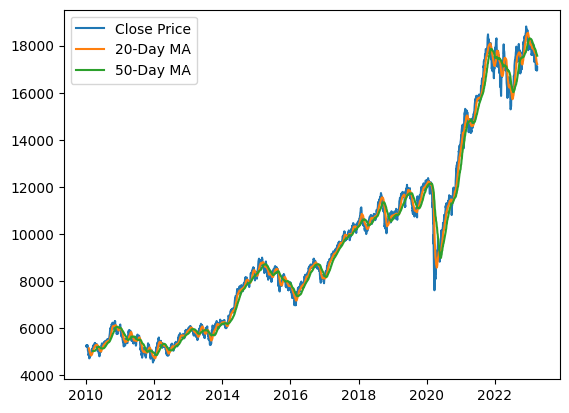

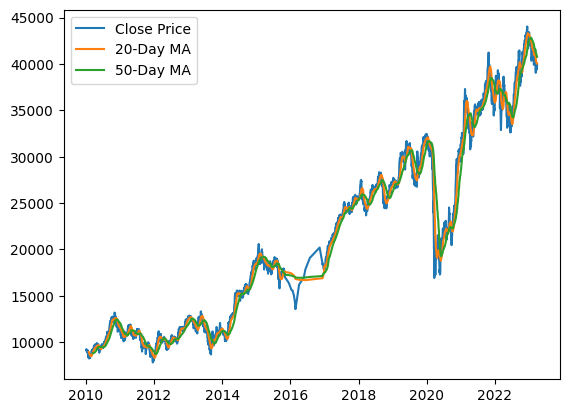

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Get OHLC data for Nifty 50 and Nifty Bank
nifty50 = yf.download('^NSEI', start='2010-01-01')
niftybank = yf.download('^NSEBANK', start='2010-01-01')

# Data cleaning
nifty50.dropna(inplace=True)
niftybank.dropna(inplace=True)

# Data visualization
plt.plot(nifty50['Close'])
plt.title('Nifty 50 OHLC Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

plt.plot(niftybank['Close'])
plt.title('Nifty Bank OHLC Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Summary statistics
print('Nifty 50 Summary Statistics:')
print(nifty50.describe())
print('\nNifty Bank Summary Statistics:')
print(niftybank.describe())

# Correlation analysis
print('Correlation between Nifty 50 Open and Close Prices:', nifty50['Open'].corr(nifty50['Close']))
print('Correlation between Nifty Bank Open and Close Prices:', niftybank['Open'].corr(niftybank['Close']))

# Moving averages
nifty50['20-Day MA'] = nifty50['Close'].rolling(window=20).mean()
nifty50['50-Day MA'] = nifty50['Close'].rolling(window=50).mean()
plt.plot(nifty50['Close'])
plt.plot(nifty50['20-Day MA'])
plt.plot(nifty50['50-Day MA'])
plt.legend(['Close Price', '20-Day MA', '50-Day MA'])
plt.show()

niftybank['20-Day MA'] = niftybank['Close'].rolling(window=20).mean()
niftybank['50-Day MA'] = niftybank['Close'].rolling(window=50).mean()
plt.plot(niftybank['Close'])
plt.plot(niftybank['20-Day MA'])
plt.plot(niftybank['50-Day MA'])
plt.legend(['Close Price', '20-Day MA', '50-Day MA'])
plt.show()

In [6]:
# Technical indicators
from ta import add_all_ta_features
nifty50_ta = add_all_ta_features(nifty50, 'Open', 'High', 'Low', 'Close', 'Volume', fillna=True)
niftybank_ta = add_all_ta_features(niftybank, 'Open', 'High', 'Low', 'Close', 'Volume', fillna=True)

/usr/local/lib/python3.9/dist-packages/ta/trend.py:780: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
/usr/local/lib/python3.9/dist-packages/ta/trend.py:785: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)


In [8]:
print(nifty50_ta.isna().sum())

Open                 0
High                 0
Low                  0
Close                0
Adj Close            0
                    ..
momentum_pvo_hist    0
momentum_kama        0
others_dr            0
others_dlr           0
others_cr            0
Length: 94, dtype: int64


In [9]:
print(nifty50_ta.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', '20-Day MA',
       '50-Day MA', 'volume_adi', 'volume_obv', 'volume_cmf', 'volume_fi',
       'volume_em', 'volume_sma_em', 'volume_vpt', 'volume_vwap', 'volume_mfi',
       'volume_nvi', 'volatility_bbm', 'volatility_bbh', 'volatility_bbl',
       'volatility_bbw', 'volatility_bbp', 'volatility_bbhi',
       'volatility_bbli', 'volatility_kcc', 'volatility_kch', 'volatility_kcl',
       'volatility_kcw', 'volatility_kcp', 'volatility_kchi',
       'volatility_kcli', 'volatility_dcl', 'volatility_dch', 'volatility_dcm',
       'volatility_dcw', 'volatility_dcp', 'volatility_atr', 'volatility_ui',
       'trend_macd', 'trend_macd_signal', 'trend_macd_diff', 'trend_sma_fast',
       'trend_sma_slow', 'trend_ema_fast', 'trend_ema_slow',
       'trend_vortex_ind_pos', 'trend_vortex_ind_neg', 'trend_vortex_ind_diff',
       'trend_trix', 'trend_mass_index', 'trend_dpo', 'trend_kst',
       'trend_kst_sig', 'trend_kst_diff', 'tre

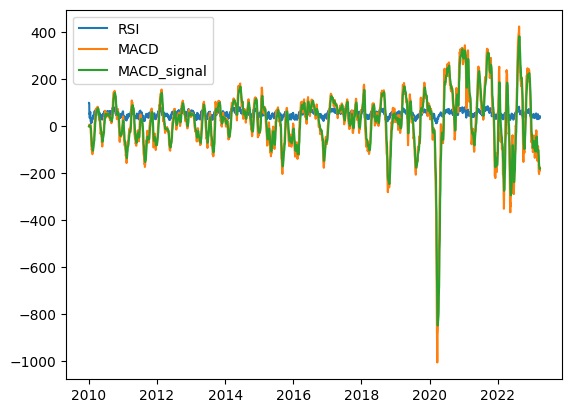

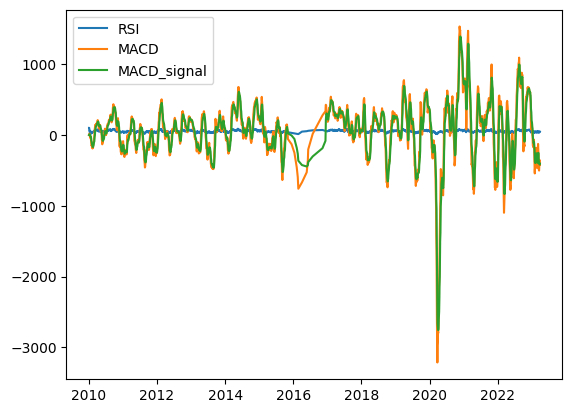

In [16]:
from ta.momentum import RSIIndicator
from ta.trend import MACD

nifty50_ta['RSI'] = RSIIndicator(nifty50_ta['Close'], window=14, fillna=True).rsi()
nifty50_ta['MACD'] = MACD(nifty50_ta['Close'], window_slow=26, window_fast=12, window_sign=9, fillna=True).macd()
nifty50_ta['MACD_signal'] = MACD(nifty50_ta['Close'], window_slow=26, window_fast=12, window_sign=9, fillna=True).macd_signal()

niftybank_ta['RSI'] = RSIIndicator(niftybank_ta['Close'], window=14, fillna=True).rsi()
niftybank_ta['MACD'] = MACD(niftybank_ta['Close'], window_slow=26, window_fast=12, window_sign=9, fillna=True).macd()
niftybank_ta['MACD_signal'] = MACD(niftybank_ta['Close'], window_slow=26, window_fast=12, window_sign=9, fillna=True).macd_signal()

plt.plot(nifty50_ta['RSI'])
plt.plot(nifty50_ta['MACD'])
plt.plot(nifty50_ta['MACD_signal'])
plt.legend(['RSI', 'MACD', 'MACD_signal'])
plt.show()

plt.plot(niftybank_ta['RSI'])
plt.plot(niftybank_ta['MACD'])
plt.plot(niftybank_ta['MACD_signal'])
plt.legend(['RSI', 'MACD', 'MACD_signal'])
plt.show()


In [17]:
# Outlier detection
q1 = nifty50['Close'].quantile(0.25)
q3 = nifty50['Close'].quantile(0.75)
iqr = q3 - q1
nifty50 = nifty50[(nifty50['Close'] > (q1 - 1.5 * iqr)) & (nifty50['Close'] < (q3 + 1.5 * iqr))]


q1 = niftybank['Close'].quantile(0.25)
q3 = niftybank['Close'].quantile(0.75)
iqr = q3 - q1
niftybank = niftybank[(niftybank['Close'] > (q1 - 1.5 * iqr)) & (niftybank['Close'] < (q3 + 1.5 * iqr))]

# Updated summary statistics
print('Updated Nifty 50 Summary Statistics:')
print(nifty50.describe())
print('\nUpdated Nifty Bank Summary Statistics:')
print(niftybank.describe())

Updated Nifty 50 Summary Statistics:
               Open          High           Low         Close     Adj Close  \
count   3250.000000   3250.000000   3250.000000   3250.000000   3250.000000   
mean    9564.525664   9613.482219   9498.933178   9557.111170   9557.111170   
std     3950.295623   3965.196543   3925.820230   3946.781987   3946.781987   
min     4623.149902   4623.149902   4531.149902   4544.200195   4544.200195   
25%     5970.687378   6006.149902   5930.199951   5967.449829   5967.449829   
50%     8586.975098   8629.825195   8540.299805   8588.450195   8588.450195   
75%    11485.075195  11540.975342  11415.324707  11465.950195  11465.950195   
max    18871.949219  18887.599609  18778.199219  18812.500000  18812.500000   

             Volume     20-Day MA     50-Day MA    volume_adi    volume_obv  \
count  3.250000e+03   3231.000000   3201.000000  3.250000e+03  3.250000e+03   
mean   2.291596e+05   9547.688673   9531.659327  7.311704e+06  1.590444e+07   
std    2.15754

In [19]:
nifty50_ta.tail()

,Open,High,Low,Close,Adj Close,Volume,20-Day MA,50-Day MA,volume_adi,volume_obv,...,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr,RSI_14,MACD,MACD_signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2023-03-23,17097.400391,17205.400391,17045.300781,17076.900391,17076.900391,219200,17304.465137,17644.075977,3.353086e+07,54428500,...,-1.676174,-6.012054,17289.655032,-0.437269,-0.438228,226.380868,38.965182,-184.649347,-174.645327,38.965182
2023-03-24,17076.199219,17109.449219,16917.349609,16945.050781,16945.050781,228000,17276.155176,17625.063008,3.336862e+07,54200500,...,-2.848490,-4.689265,17251.522292,-0.772093,-0.775089,223.860903,35.551258,-190.052698,-177.726801,35.551258
2023-03-27,16984.300781,17091.000000,16918.550781,16985.699219,16985.699219,218400,17252.150098,17607.613008,3.332030e+07,54418900,...,-3.811348,-3.851429,17242.282600,0.239884,0.239597,224.637793,37.373006,-188.877639,-179.956969,37.373006
2023-03-28,17031.750000,17061.750000,16913.750000,16951.699219,16951.699219,238800,17230.100098,17587.515000,3.320396e+07,54180100,...,-4.448686,-2.549352,17236.788327,-0.200168,-0.200369,223.987970,36.445040,-188.516808,-181.668937,36.445040
2023-03-29,16977.300781,17126.150391,16940.599609,17080.699219,17080.699219,345900,17218.937598,17571.231992,3.338040e+07,54526000,...,-4.141925,1.227044,17233.512939,0.760986,0.758105,226.453472,42.299039,-175.795168,-180.494183,42.299039
